# Project: Olist Marketing Funnel Analysis

***What is olist?***

Olist is an e-commerce enterprise based in Sao Paulo, Brazil, serving as an intermediary between numerous small businesses and customers seeking to purchase their products. The company had published a [dataset on Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) featuring data on 100,000 orders placed on various marketplaces from 2016 to 2018. The data includes information about the customers, the sellers, the products, and the order history. This dataset is useful for various data analysis tasks, including market research, customer segmentation, and sales forecasting. 

Consumers are influenced by product reviews when shopping online, and Olist could utilize this information to remove items with consistently negative reviews and promote those that are popular among customers.

***The marketing funnel dataset***

A seller join Olist through a marketing and sales funnel that was made public at this dataset. Description of steps:

1. Sign-up at a landing page.
2. Get contacted by a Sales development Representative (SDR), confirm some information and schedule a consultancy.
3. Consultancy is made by a Sales Representative (SR). The SR may close the deal (lead sign up) or lose the deal (led leaves without sign up)
4. Lead becomes a seller and starts building his catalog on Olist.
5. His products are published on marketplaces and ready to sell!<br>

<mark>The objective of this analyis will be to do the following:</mark>
- Finding out which sales funnel works best
- Finding The Customer LTV
- Monthly performance
- Best selling categories
- Future sales predictions

We will also try to do these tasks in seperate analysis:

**Customer behavior:** The dataset can be used to analyze customer behavior, such as buying patterns, preferences, and satisfaction levels.

**Product analysis:** The dataset can help identify the best-selling products, the most profitable product categories, and the product categories with the highest returns.

**Seller performance:** The dataset can be used to evaluate the performance of sellers based on factors such as delivery time, seller ratings, and order cancellations.

**Geographical analysis:** The dataset can help identify the regions with the highest demand for products and the areas with the highest concentration of sellers.

**Order processing:** The dataset can be used to analyze the order processing times, shipping delays, and customer feedback.

*We will start with importing the libraries and the datasets. Then we will join various datasets, do a basic EDA to see any patterns, conduct a RFM analyis and finally build a model using Tensorflow. That's the plan, lets see how it goes!* 

<a id='data-clean'></a>
### Data wrangling and cleaning

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


**Reading the various datasets**

In [2]:
# leads dataset
mql = pd.read_csv('marketing_qualified_leads.csv')
mql.head(2)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search


There are 8,000 rows out of which **495 have unique landing page id**

In [3]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [4]:
mql['landing_page_id'].nunique()

495

These are the top 5 instances of landing page ids.

In [5]:
mql['landing_page_id'].value_counts().sort_values(ascending=False).head(5)

landing_page_id
b76ef37428e6799c421989521c0e5077    912
22c29808c4f815213303f8933030604c    883
58326e62183c14b0c03085c33b9fdc44    495
88740e65d5d6b056e0cda098e1ea6313    445
ce1a65abd0973638f1c887a6efcfa82d    394
Name: count, dtype: int64

In terms of origin, we can see the following: 

In [6]:
mql['origin'].value_counts().sort_values(ascending=False).head(5)

origin
organic_search    2296
paid_search       1586
social            1350
unknown           1099
direct_traffic     499
Name: count, dtype: int64

In [7]:
# closed deals dataset
closed_deals = pd.read_csv('closed_deals.csv')
closed_deals.head(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0


Since, there are some columns that have only a few non null values we will be dropping those columns. Another option could have been to impute the data from missing values, but without domain knowledge as Brazillian e-commerce contexts, it would not be wise. 

In [8]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [9]:
percent_nonnll = closed_deals.count()/len(closed_deals)

In [10]:
threshold = 0.2
closed_deals = closed_deals.loc[:,percent_nonnll>=threshold]

We are left with the following columns.

In [11]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mql_id                    842 non-null    object 
 1   seller_id                 842 non-null    object 
 2   sdr_id                    842 non-null    object 
 3   sr_id                     842 non-null    object 
 4   won_date                  842 non-null    object 
 5   business_segment          841 non-null    object 
 6   lead_type                 836 non-null    object 
 7   lead_behaviour_profile    665 non-null    object 
 8   business_type             832 non-null    object 
 9   declared_monthly_revenue  842 non-null    float64
dtypes: float64(1), object(9)
memory usage: 65.9+ KB


In [12]:
closed_deals['seller_id'].nunique()

842

*Joining the marketing funnel dataset with the closed deals dataset, NaNs are leads that did not close a deal, which we will change to **No deals** on the seller_id column to ensure proper readability.*

In [13]:
# marketing funnel dataset (NaNs are leads that did not close a deal)
mf = mql.merge(closed_deals, on='mql_id', how='left')
mf['seller_id'] = mf['seller_id'].fillna('No deals')
mf.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,No deals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,No deals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,No deals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,No deals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0


In [14]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mql_id                    8000 non-null   object 
 1   first_contact_date        8000 non-null   object 
 2   landing_page_id           8000 non-null   object 
 3   origin                    7940 non-null   object 
 4   seller_id                 8000 non-null   object 
 5   sdr_id                    842 non-null    object 
 6   sr_id                     842 non-null    object 
 7   won_date                  842 non-null    object 
 8   business_segment          841 non-null    object 
 9   lead_type                 836 non-null    object 
 10  lead_behaviour_profile    665 non-null    object 
 11  business_type             832 non-null    object 
 12  declared_monthly_revenue  842 non-null    float64
dtypes: float64(1), object(12)
memory usage: 812.6+ KB


We will join this dataset with the seller dataset to get more information and the sellers. <br>
We will do a basic EDA and try to answer the following: Which SR or SDR should talk with each kind of lead? Which deals should get closed?


In [15]:
# sellers dataset
sellers = pd.read_csv('sellers.csv')
# marketing funnel merged with sellers (this way we get the seller location and other relevant information)
mf_sellers = mf.merge(sellers, on='seller_id', how='left')
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mql_id                    8000 non-null   object 
 1   first_contact_date        8000 non-null   object 
 2   landing_page_id           8000 non-null   object 
 3   origin                    7940 non-null   object 
 4   seller_id                 8000 non-null   object 
 5   sdr_id                    842 non-null    object 
 6   sr_id                     842 non-null    object 
 7   won_date                  842 non-null    object 
 8   business_segment          841 non-null    object 
 9   lead_type                 836 non-null    object 
 10  lead_behaviour_profile    665 non-null    object 
 11  business_type             832 non-null    object 
 12  declared_monthly_revenue  842 non-null    float64
 13  seller_zip_code_prefix    380 non-null    float64
 14  seller_c

We will convert the dates to datetime objects and take the *difference between won_date and first_contact_date*, this will be a feature we will use in the model training.

In [16]:
# Convert dates to datetime objects
mf_sellers["first_contact_date"] = pd.to_datetime(mf_sellers["first_contact_date"])
mf_sellers["won_date"] = pd.to_datetime(mf_sellers["won_date"])
mf_sellers["days_to_convert"]=(mf_sellers["won_date"]-mf_sellers["first_contact_date"]).dt.days.fillna("No Deals")

In [17]:
mf_sellers.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,days_to_convert
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,No deals,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Deals
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,No deals,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Deals
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,No deals,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Deals
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,No deals,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Deals
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,30421.0,belo horizonte,MG,5.0


In [18]:
mf_s_cd = mf_sellers[mf_sellers['seller_id']!='No deals']

In [21]:
mf_s_cd

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,days_to_convert
4,5420aad7fec3549a85876ba1c529bd84,2018-02,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02,pet,online_medium,cat,reseller,0.0,30421.0,belo horizonte,MG,5.0
12,a555fb36b9368110ede0f043dfc3b9a0,2018-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05,car_accessories,industry,eagle,reseller,0.0,NaN,NaN,NaN,34.0
14,327174d3648a2d047e8940d7d15204ca,2018-04,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06,home_appliances,online_big,cat,reseller,0.0,93542.0,novo hamburgo,RS,63.0
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01,food_drink,online_small,NaN,reseller,0.0,NaN,NaN,NaN,3.0
67,ffe640179b554e295c167a2f6be528e0,2017-10,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07,home_appliances,industry,wolf,manufacturer,0.0,11015.0,santos,SP,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,df9a2abe2ad3f2d8758b675ac8331ecf,2018-03,a7982125ff7aa3b2054c6e44f9d28522,organic_search,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08,home_decor,offline,cat,reseller,0.0,NaN,NaN,NaN,126.0
7983,8723201570415eb23b4f095d8c20a27c,2018-05,b76ef37428e6799c421989521c0e5077,organic_search,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09,construction_tools_house_garden,online_big,wolf,reseller,200000.0,NaN,NaN,NaN,132.0
7991,2e57665b8faf05c967a801eb5aedfa0a,2018-05,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06,computers,online_medium,wolf,reseller,0.0,NaN,NaN,NaN,12.0
7994,40955be51cc85c5a5a6cdd12b19e9f10,2018-02,88740e65d5d6b056e0cda098e1ea6313,social,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03,pet,online_beginner,cat,reseller,0.0,NaN,NaN,NaN,30.0


In [22]:
mf_s_cd['won_date'] = pd.to_datetime(mf_s_cd["won_date"]).dt.strftime('%Y-%m')
mf_s_cd['first_contact_date'] = pd.to_datetime(mf_s_cd["first_contact_date"] ).dt.strftime('%Y-%m')

C:\Users\u\AppData\Local\Temp\ipykernel_13856\3376814189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_s_cd['won_date'] = pd.to_datetime(mf_s_cd["won_date"]).dt.strftime('%Y-%m')
C:\Users\u\AppData\Local\Temp\ipykernel_13856\3376814189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_s_cd['first_contact_date'] = pd.to_datetime(mf_s_cd["first_contact_date"] ).dt.strftime('%Y-%m')


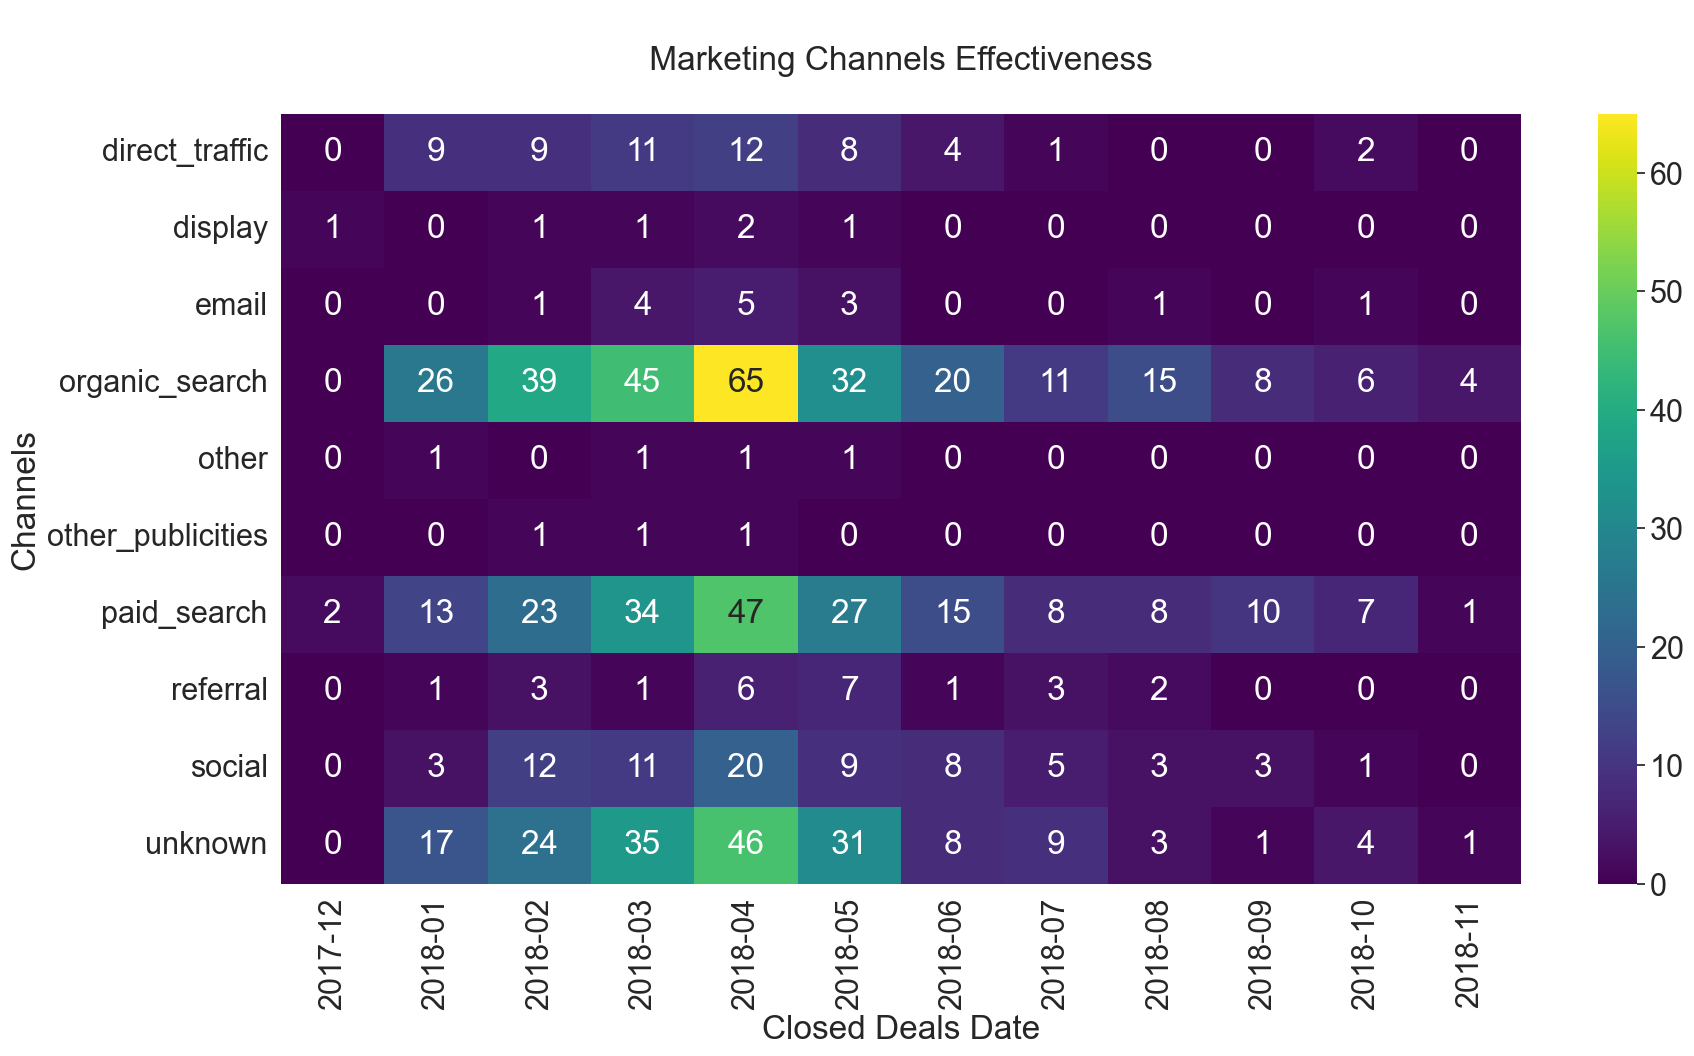

In [24]:
MCE = pd.pivot_table(mf_s_cd,
            index='origin',
            columns='won_date',
            values='declared_monthly_revenue',                            
            aggfunc='count',
            fill_value=0)

plt.figure(figsize=(20,10))
sns.set(font_scale=2);

sns.heatmap(MCE, annot=True,cmap='viridis').set(title='\n Marketing Channels Effectiveness \n');

plt.xlabel("Closed Deals Date");
plt.ylabel("Channels");

In [ ]:
# order items dataset
items = pd.read_csv('order_items.csv')
items.head(10)

In [ ]:
# marketing funnel merged with items (this way you get products sold by sellers)
mf_items = mf.merge(items, on='seller_id', how='left')
mf_items.head(10)

## Customer LTV

**Lifetime Value (LTV): Total Gross Revenue - Total Cost**

As the dataset doesn't contain the **CAC(Customer Acquisition Costs)**- the lifetime value of each customer is the total revenue generated. Interestingly, the total revenue classification in an e-commerce can vary in the sense that if the platform is **"sharing the shipping fees revenue with the seller"** or not. Since nothing is indicated in the dataset, let us assume they are not. 

##### Getting the customer Data and orders data

In [ ]:
df_customer=pd.read_csv('customers.csv')
df_orders=pd.read_csv('orders.csv')
df_payments=pd.read_csv('order_payments.csv')

## Customer Segmentation with RFM analysis

In [ ]:
## getting order id by customer purchases 

df_customer_order=pd.merge(df_customer,df_orders[['order_id','customer_id','order_purchase_timestamp']],on='customer_id')


In [ ]:
## payments in same order id are combined to get total spending on an order
paid= df_payments[['order_id','payment_value']].groupby('order_id').sum().reset_index()

In [ ]:
paid

In [ ]:
# now the total payment by each order is merged to the cutomer who has bought it to find the total amount purchase
df_customer_order_rev=pd.merge(df_customer_order,paid,on='order_id')

In [ ]:
# unwanted columns are dropped
df_customer_order_rev.drop(['customer_zip_code_prefix','customer_city','customer_state'],axis=1,inplace=True)

In [ ]:
df_customer_order_rev['order_purchase_timestamp']=pd.to_datetime(df_customer_order_rev['order_purchase_timestamp']).dt.date

In [ ]:
# find the last date on which customer made the purchase
recency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['order_purchase_timestamp'].max())

In [ ]:
# we take the maximum date of purchase made by customers as the date to calculate the recency of the purchase
## 2018-10-17
recency['recent_days']=recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']


In [ ]:
recency

In [ ]:
# int(recency['recent_days'][0].total_seconds()/86400)
recency['recent_days'] = recency['recent_days'].apply(lambda x:int(x.total_seconds()/86400))

In [ ]:
# the number of times a unique customer has made purchase
frequency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['customer_id'].count())

In [ ]:
monetary=pd.DataFrame(df_customer_order_rev[['customer_unique_id','payment_value']].groupby('customer_unique_id')['payment_value'].sum())

In [ ]:
df_rfm=pd.merge(recency,frequency,on='customer_unique_id')
df_rfm=pd.merge(df_rfm,monetary,on='customer_unique_id')

In [ ]:
# Freqency - Number of purchase made
## Recency- Days from last purchase
## Monetary-- total amount purchase for by a customer
df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm.reset_index(inplace=True)
df_rfm.columns=['Cust_unique_Id','Recency','Frequency','Monetary']
#use CustomerID as index
df_rfm.set_index('Cust_unique_Id',inplace=True)
df_rfm

In [ ]:
## the descriptive stats for the RFM analysis
df_rfm.describe()

Only **3.11% of the users have more than 1 purchase**, in this case, focusing on monetary value should be more critical for future marketing spends or it would be wise to spend on categories that drive repeat purchases. 

In [ ]:
(df_rfm[df_rfm['Frequency']>1].shape[0]/96095)*100

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(df_rfm['Recency'],kde=False)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(df_rfm['Frequency'],kde=False)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(df_rfm['Monetary'],kde=False)
# Show the plot
plt.show()

**2. Sales Performance Overview**

In this part I will answer to following questions:
- What has performance been monthly?
- What are the best selling categories?
For this reason I will calcualte total revenue from closed deals and find out the top revenue-generating segment.


In [ ]:
# Load datasets
order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv',
                     parse_dates=['order_purchase_timestamp'])
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
product_translation = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

In [ ]:
closed_deals.tail(100)

In [ ]:
#get some info about dataframes

print(closed_deals.shape)
print(order_items.shape)
print(orders.shape)
print(products.shape)
print(product_translation.shape)

In [ ]:
# Merge all dataframes
df = pd.merge(closed_deals,order_items,
                how='inner', on='seller_id')
df = pd.merge(df, orders,
                how='inner', on='order_id')
df = pd.merge(df, products,
                how='inner', on='product_id')
df = pd.merge(df, product_translation,
                how='left', on='product_category_name')
df.shape

In [ ]:
df

In [ ]:
# Sort out orders not devliered to customers
data = data[data['order_status'] == 'delivered']

# Add a 'year-month' column
data['order_purchase_timestamp(y-m)'] = data['order_purchase_timestamp'].dt.to_period('M')

print(data.shape)
data.head(3)

Monthly Revenues by Business Segment


In [ ]:
columns = df.groupby(by='business_segment') \
           .price \
           .sum() \
           .sort_values(ascending=False) \
           .index

monthly_revenue = df.groupby(['order_purchase_timestamp(y-m)', 'business_segment']) \
                              .price \
                              .sum() \
                              .unstack(level=1, fill_value=0)

monthly_revenue = monthly_revenue[columns]
monthly_revenue

In [ ]:
monthly_revenue.tail(10)

In [ ]:
# Plot the monthly revenues by segment
monthly_revenue.plot.area(figsize=(20,8))

plt.title('Monthly Revenues by Segments', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

Total revenues across 29 segments came in at 664,858 in the first eight months of 2018.
The biggest segment was 'watches', which generated 17.4% of total revenues (115,901).

In [ ]:
# Create watches segment dataframe
watches = df[df.business_segment == 'watches']
watches.shape

In [ ]:
# Create monthly revenues by product category
columns = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

monthly_revenue_category = watches.groupby(['order_purchase_timestamp(y-m)', 'product_category_name_english']) \
                                  .price \
                                  .sum() \
                                  .unstack(level=1, fill_value=0)

monthly_revenue_category = monthly_revenue_category[columns]
monthly_revenue_category

In [ ]:
# Plot the monthly revenues by category
monthly_revenue_category.plot.area(figsize=(12,6))
plt.title('Monthly Revenues by Product Category of Watches', fontsize=14);

In [ ]:
# Create 'seller - product category' table
cols = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

watches_seller_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                .price \
                                .sum() \
                                .unstack(level=1, fill_value=0)

watches_seller_revenue = watches_seller_revenue[cols]
watches_seller_revenue['total'] = watches_seller_revenue.sum(axis=1)

watches_seller_revenue

'watches_gifts' category generated 79.7% of total revenue of segment.
'watches_gifts' revenue soared in March and reached its peak in May. This category seems a seasonal item.
Except 'watches_gifts', product categories are irrelevant to watches segment.


In [ ]:
# Create 'category - seller' table
index = watches.groupby('product_category_name_english') \
               .price \
               .sum() \
               .sort_values() \
               .index

seller_category_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                 .price \
                                 .sum() \
                                 .unstack(level=0, fill_value=0) \
                                 
seller_category_revenue = seller_category_revenue.reindex(index)
seller_category_revenue

In [ ]:
# Plot the above table
seller_category_revenue.plot.barh(stacked=True, figsize=(12,6))

plt.title('Watches Revenue by Seller', fontsize=14)
plt.legend(loc='lower right');

Though 'watches' segment is the largest part of revenue, it has only two sellers.
Furthermore, the leading seller generated 97.0% of segment revenue.

>****Predict future revenue****

In [ ]:

orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
order_item = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')

In [ ]:
orders = orders[['order_id', 'order_purchase_timestamp']]
order_item = order_item[['order_id', 'price']]

In [ ]:
orders_items = pd.merge(orders, order_item, on='order_id')
orders_items.head()

In [ ]:
df_final = orders_items[['order_purchase_timestamp', 'price']]

df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_purchase_timestamp'] = df_final['order_purchase_timestamp'].dt.date
df_final=df_final[(df_final['order_purchase_timestamp'] > dt.strptime('2017-01-01', '%Y-%m-%d').date()) &  (df_final['order_purchase_timestamp'] < dt.strptime('2018-09-30', '%Y-%m-%d').date())]

df_final.columns = ['order_purchase_timestamp', 'valor']
df_final = df_final.sort_values('order_purchase_timestamp')
df_final.head(100)

In [ ]:
df_final = df_final[['order_purchase_timestamp', 'valor']]

df_final = df_final.groupby(['order_purchase_timestamp']).sum()
df_groupby_copy = df_final

df_groupby_copy['data'] = df_final.index.values
df_groupby_copy_ARIMA = df_groupby_copy
df_groupby_copy.head()

In [ ]:
df_groupby_copy = df_groupby_copy[['valor']]
df_groupby_copy.head()

In [ ]:
df_groupby_copy.head()


In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(18, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_ylabel('valor', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

In [ ]:
train, test = train_test_split(df_groupby_copy, test_size=0.2)

line_plot(train.valor, test.valor, 'training', 'test', 'Datasets to compare')


In [ ]:
def create_lookback(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
test.head()

In [ ]:
train.head()

In [ ]:
training_set = train.values
training_set = np.array(training_set).reshape((-1,1))
training_set = np.reshape(training_set, (len(training_set), 1))

test_set = test.values
test_set = np.array(test_set).reshape((-1,1))
test_set = np.reshape(test_set, (len(test_set), 1))

#scale datasets
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

# create datasets which are suitable for time series forecasting
look_back = 1
X_train, Y_train = create_lookback(training_set, look_back)
X_test, Y_test = create_lookback(test_set, look_back)

 # reshape datasets so that they will be ok for the requirements of the LSTM model in Keras
X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [ ]:
model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

history = model.fit(X_train, Y_train, epochs=50, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test), verbose=1,
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])

> ****Predictions****

In [ ]:
prediction = model.predict(X_test)


In [ ]:
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

prediction2_inverse = np.array(prediction_inverse[:,0][1:])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

In [ ]:
Y_test2_inverse_without_last = Y_test2_inverse[:-1]
RMSE = sqrt(mean_squared_error(Y_test2_inverse_without_last, prediction2_inverse))
print('Test RMSE: %.3f' % RMSE)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [ ]:
Test_Dates = test.index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))

trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'With purchase date information to predict future sales',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'purchase value'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating1')


****ARIMA Prediction****
****

In [ ]:
df_groupby_copy.head()


In [ ]:
y = df_groupby_copy

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

warnings.filterwarnings('ignore')

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = y[493:].plot(label='observed', figsize=(18, 9))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='white', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()

plt.show()

Conclusion:
    
  We have a clear picture that:
    - From all customers only 3% are recurring and remaining 97% are just below 1 year purchasers.
    - Total revenues across 29 segments came in at 664,858 in the first eight months of 2018. The biggest segment was 'watches', which generated 17.4% of total revenues (115,901).
    - The best categories are watches and audio
    - Though 'watches' segment is the largest part of revenue, it has only two sellers. Furthermore, the leading seller generated 97.0% of segment revenue. 